In [30]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')


In [31]:
from google.colab import files
uploaded = files.upload()


Saving adult 3.csv to adult 3 (1).csv


In [36]:
import io

# Load dataset
df = pd.read_csv("adult 3.csv")

# Display first 5 rows
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [52]:
import pandas as pd
import io

# Load CSV
df = pd.read_csv(io.BytesIO(uploaded["adult 3 (1).csv"]), header=None)

# Add column names
df.columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status',
    'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]

df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
4,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K


In [38]:
# Replace '?' with NaN
df.replace(' ?', pd.NA, inplace=True)

# Check missing values
df.isna().sum()


,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [53]:
# Drop rows with missing values
df.dropna(inplace=True)

# Reset index after drop
df.reset_index(drop=True, inplace=True)

print("Data shape after dropping missing values:", df.shape)


Data shape after dropping missing values: (48843, 15)


In [54]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
categorical_cols = df.select_dtypes(include='object').columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("Categorical columns encoded:", list(categorical_cols))


Categorical columns encoded: ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


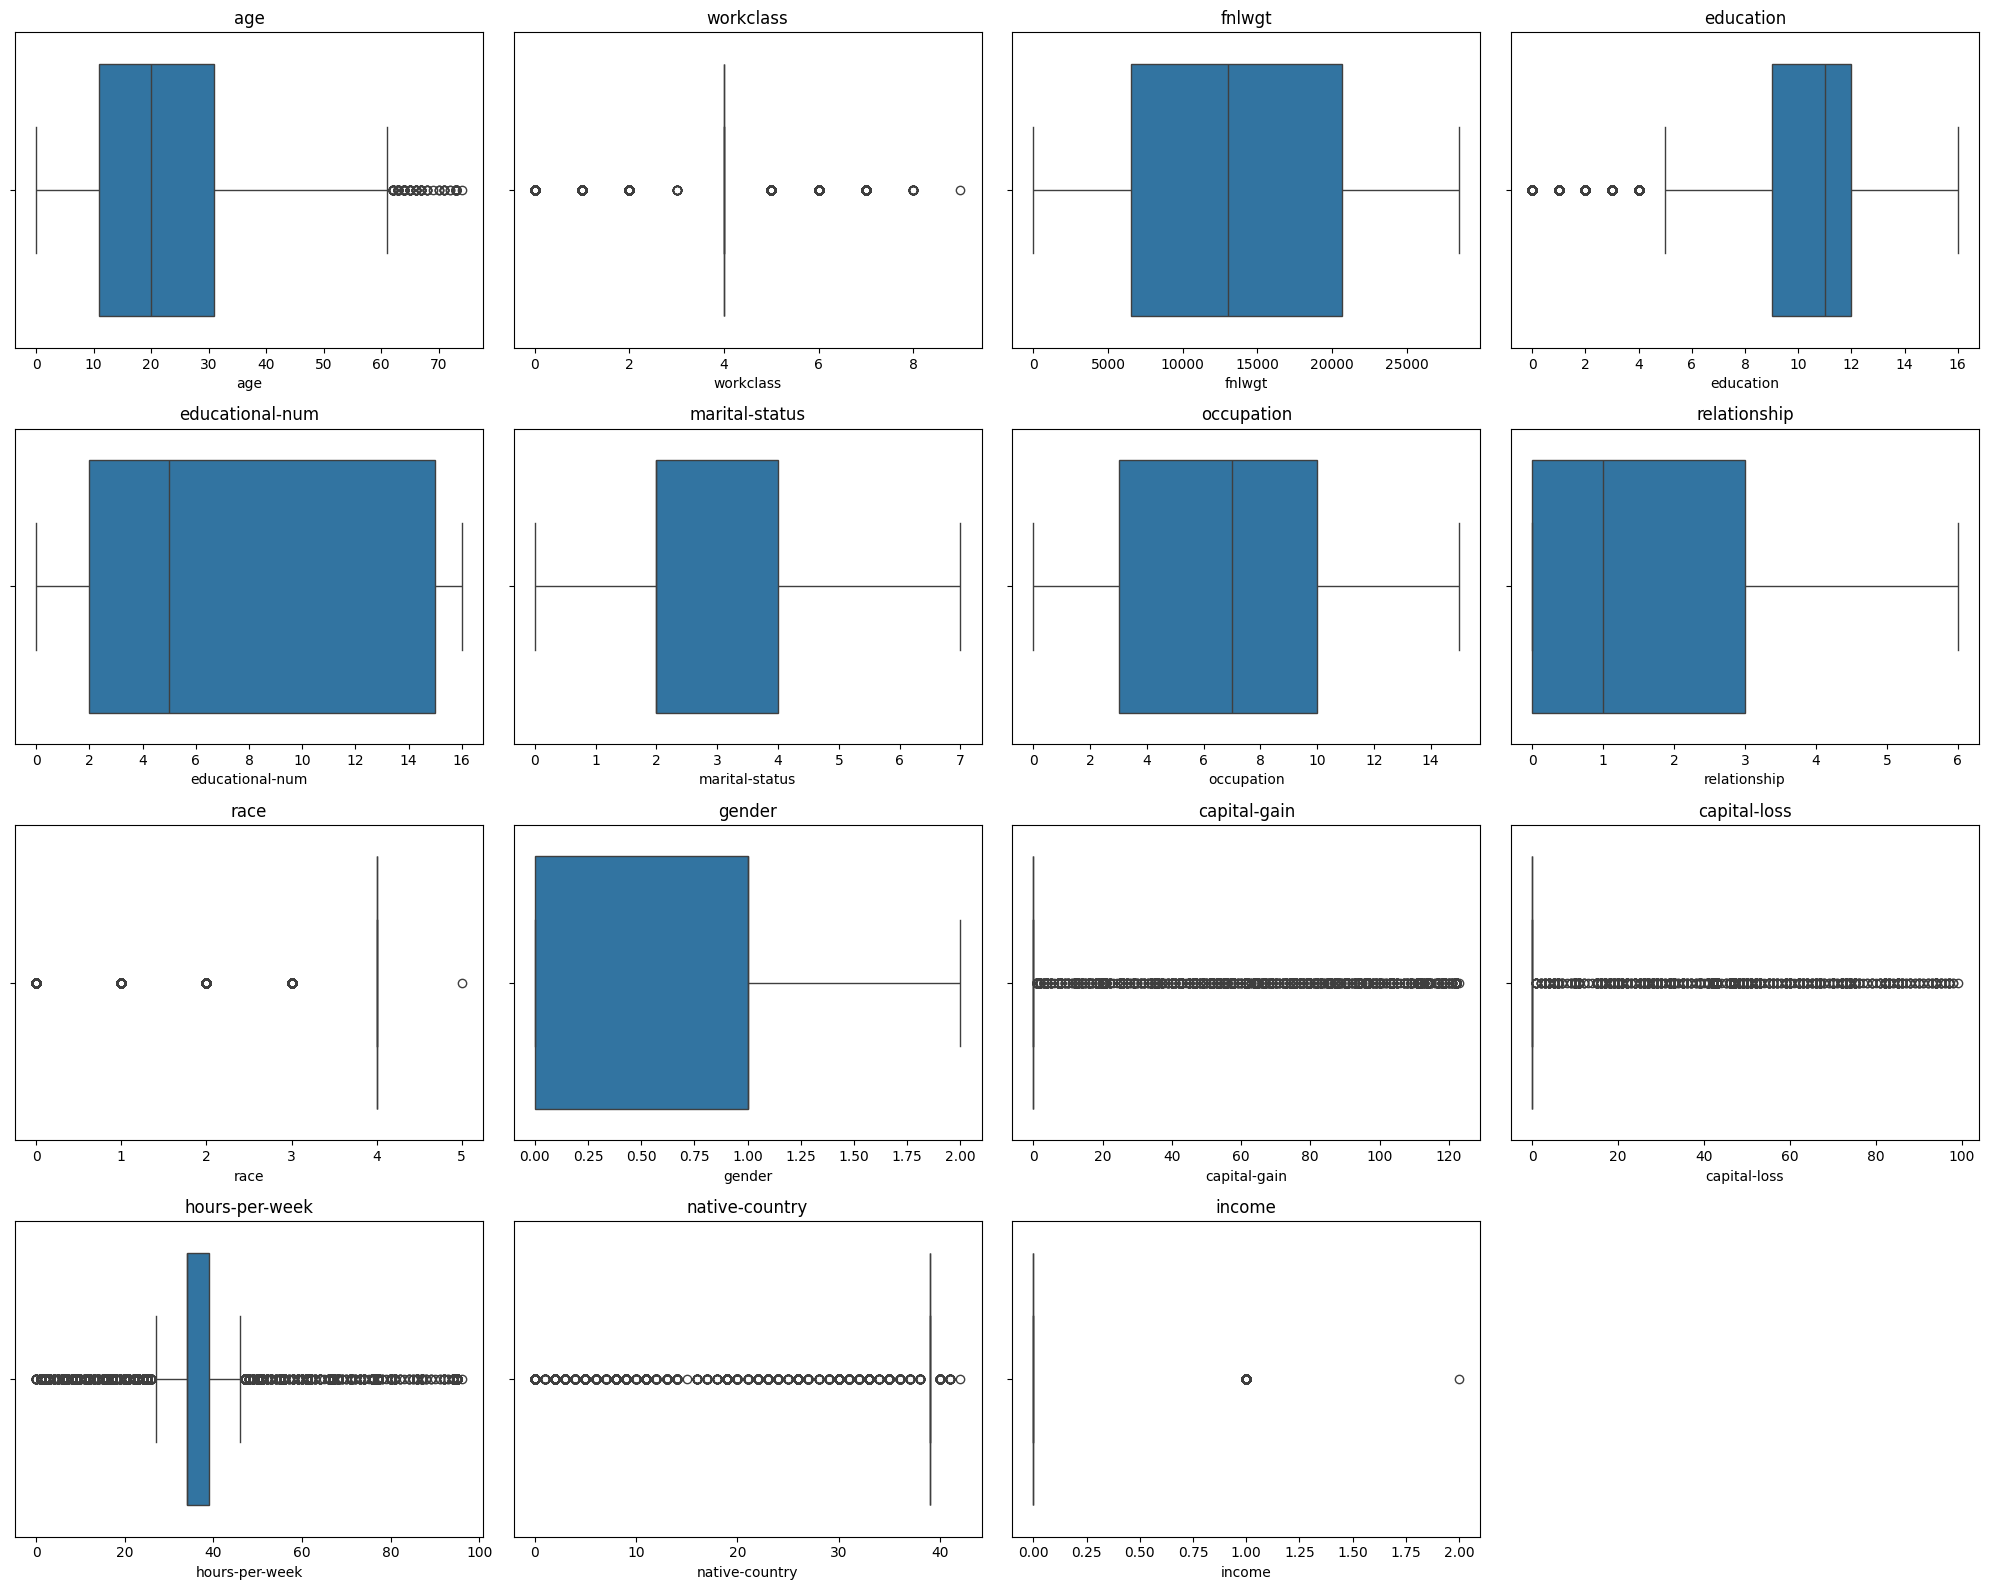

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

numeric_cols = df.select_dtypes(include='number').columns

n_cols = 4
n_rows = math.ceil(len(numeric_cols) / n_cols)

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()



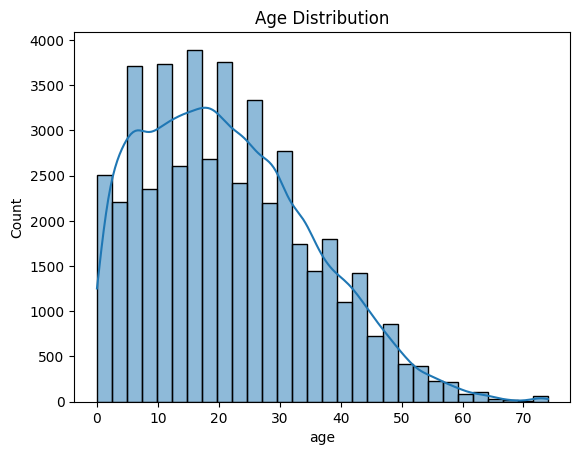

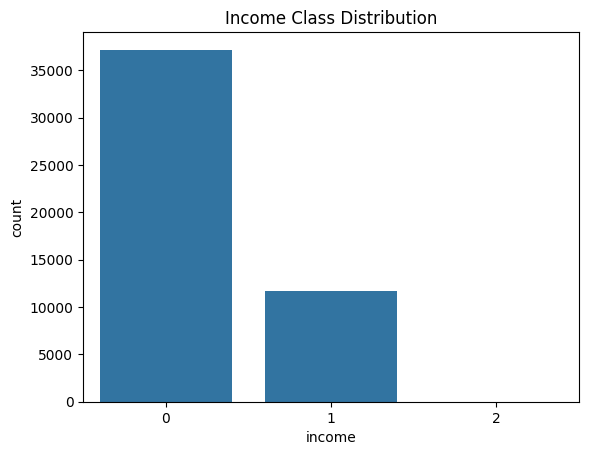

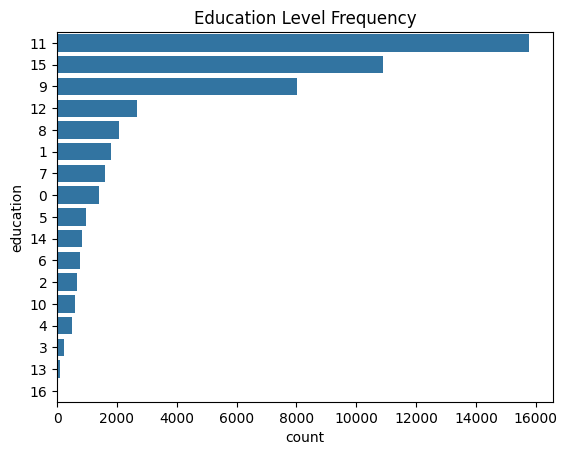

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Age distribution
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# Income count
sns.countplot(x='income', data=df)
plt.title("Income Class Distribution")
plt.show()

# Education level
sns.countplot(y='education', data=df, order=df['education'].value_counts().index)
plt.title("Education Level Frequency")
plt.show()


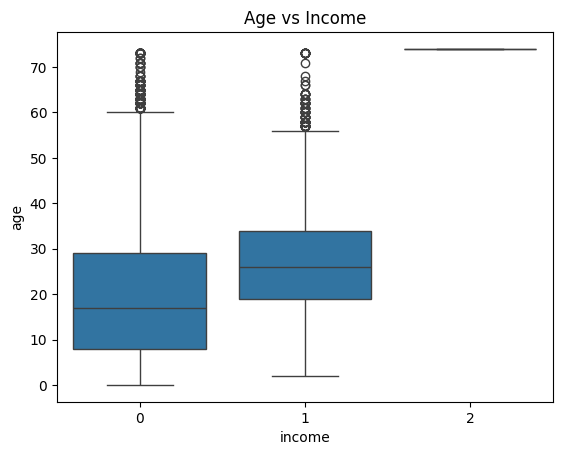

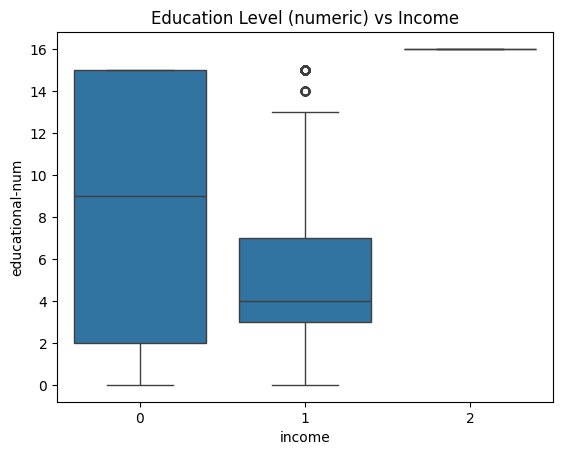

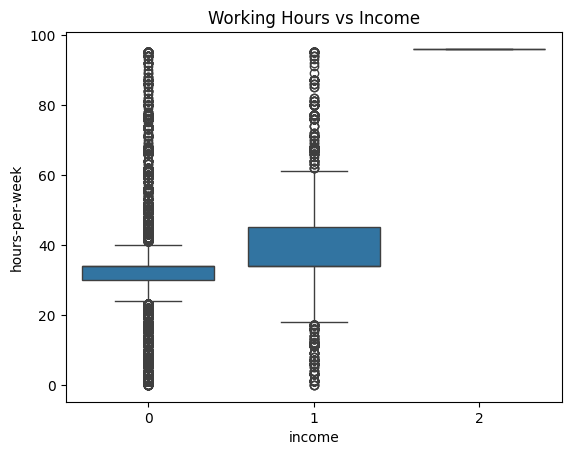

In [57]:
# Age vs Income
sns.boxplot(x='income', y='age', data=df)
plt.title("Age vs Income")
plt.show()

# Education vs Income
sns.boxplot(x='income', y='educational-num', data=df)
plt.title("Education Level (numeric) vs Income")
plt.show()

# Hours-per-week vs Income
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title("Working Hours vs Income")
plt.show()


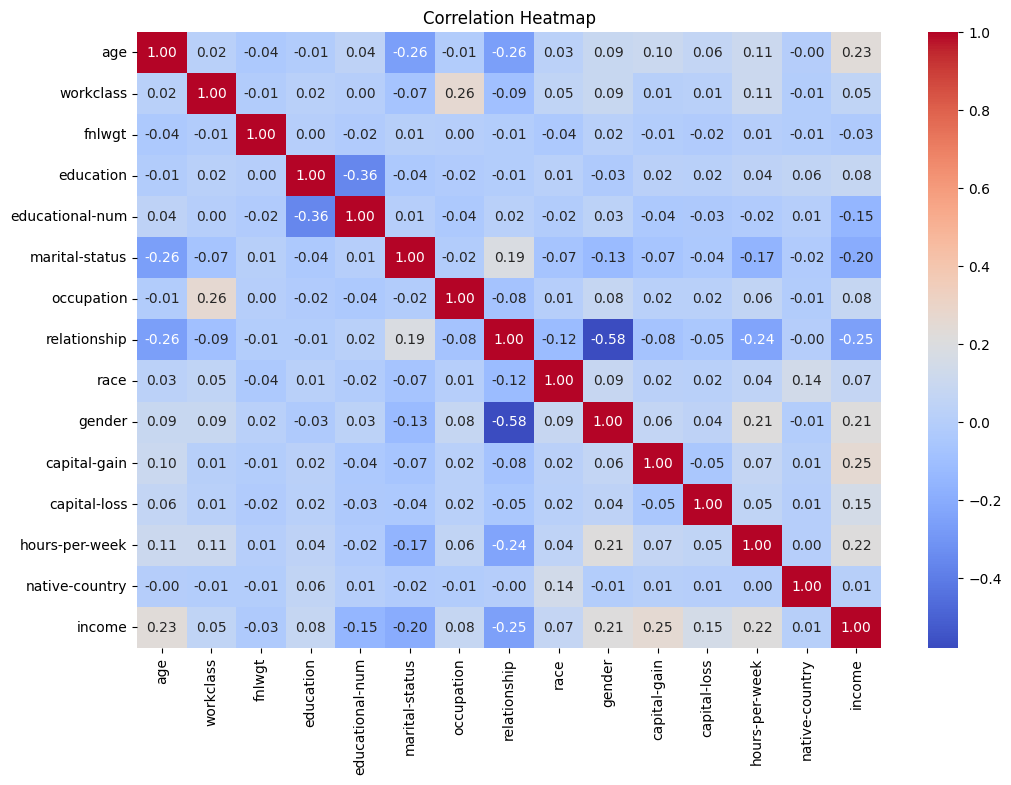

In [58]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [59]:
# Features and target
X = df.drop('income', axis=1)
y = df['income']

# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


Training shape: (39074, 14)
Testing shape: (9769, 14)


In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [61]:
# Models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}


In [62]:
from sklearn.metrics import mean_squared_error, r2_score

# Store results
results = []

for name, model in models.items():
    # Choose scaled or unscaled data depending on model
    if name in ['Linear Regression', 'Lasso Regression', 'Ridge Regression']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': name,
        'MSE': round(mse, 4),
        'R²': round(r2, 4)
    })

# Show results
results_df = pd.DataFrame(results)
results_df.sort_values(by='R²', ascending=False)


,Model,MSE,R²
4,Gradient Boosting,0.0992,0.4536
3,Random Forest,0.1029,0.4335
0,Linear Regression,0.1429,0.2130
2,Ridge Regression,0.1429,0.2130
1,Lasso Regression,0.1816,-0.0000


from matplotlib import pyplot as plt
_df_10['MSE'].plot(kind='hist', bins=20, title='MSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11['R²'].plot(kind='hist', bins=20, title='R²')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_12.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13.plot(kind='scatter', x='MSE', y='R²', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['MSE']
  ys = series['R²']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('MSE', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MSE')
_ = plt.ylabel('R²')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['MSE']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'MSE'}, axis=1)
              .sort_values('MSE', ascending=True))
  xs = counted['MSE']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('MSE', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MSE')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_16['MSE'].plot(kind='line', figsize=(8, 4), title='MSE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['R²'].plot(kind='line', figsize=(8, 4), title='R²')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='MSE', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='R²', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [75]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

# Create a results dictionary
results = {
    "Model": ["Linear Regression", "Lasso Regression", "Ridge Regression", "Random Forest", "Gradient Boosting"],
    "MSE": [
        mean_squared_error(y_test, models['Linear Regression'].predict(X_test_scaled)),
        mean_squared_error(y_test, models['Lasso Regression'].predict(X_test_scaled)),
        mean_squared_error(y_test, models['Ridge Regression'].predict(X_test_scaled)),
        mean_squared_error(y_test, models['Random Forest'].predict(X_test)),
        mean_squared_error(y_test, models['Gradient Boosting'].predict(X_test))
    ],
    "R²": [
        r2_score(y_test, models['Linear Regression'].predict(X_test_scaled)),
        r2_score(y_test, models['Lasso Regression'].predict(X_test_scaled)),
        r2_score(y_test, models['Ridge Regression'].predict(X_test_scaled)),
        r2_score(y_test, models['Random Forest'].predict(X_test)),
        r2_score(y_test, models['Gradient Boosting'].predict(X_test))
    ]
}

# Create DataFrame and sort by best R²
results_df = pd.DataFrame(results).sort_values(by='R²', ascending=False).reset_index(drop=True)

# Show results
results_df

,Model,MSE,R²
0,Gradient Boosting,0.099204,0.453631
1,Random Forest,0.102866,0.433464
2,Linear Regression,0.142903,0.212958
3,Ridge Regression,0.142903,0.212958
4,Lasso Regression,0.181571,-0.000007


In [65]:
import joblib

# Save model and scaler
joblib.dump(models['Gradient Boosting'], 'salary_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [66]:
from google.colab import files
files.download('salary_model.pkl')
files.download('scaler.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [73]:
# Get user input
age = int(input("Enter Age (18–65): "))
education_num = int(input("Enter Education Level (1–16): "))
hours_per_week = int(input("Enter Hours per Week (1–100): "))
capital_gain = int(input("Enter Capital Gain (0–99999): "))
capital_loss = int(input("Enter Capital Loss (0–4356): "))

# Create input DataFrame
custom_input = pd.DataFrame([[age, 0, 0, 0, education_num, 0, 0, 0, 0, 0, capital_gain, capital_loss, hours_per_week, 0]],
                            columns=['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
                                     'marital-status', 'occupation', 'relationship', 'race', 'gender',
                                     'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'])

# Select the best performing model
best_model = models['Gradient Boosting']

# Scale input
custom_scaled = scaler.transform(custom_input)

# Predict
prediction = best_model.predict(custom_scaled)

# Output result
print("\n🔮 Predicted Income Level:")
if prediction[0] == 1:
    print("💰 More than 50K")
else:
    print("🧾 Less than or equal to 50K")

Enter Age (18–65): 54
Enter Education Level (1–16): 5
Enter Hours per Week (1–100): 55
Enter Capital Gain (0–99999): 555555
Enter Capital Loss (0–4356): 655

🔮 Predicted Income Level:
🧾 Less than or equal to 50K


In [76]:
import joblib

# Save your trained model and scaler
joblib.dump(best_model, 'salary_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

## ✅ Project Conclusion

In this project, we built a Salary Prediction system using the Adult Income dataset. After preprocessing the data, handling missing values, encoding categorical variables, and performing feature scaling, we trained several regression models. The Gradient Boosting Regressor performed the best with an R² score of approximately 0.45.

The model and scaler were saved using `joblib`, making it ready for deployment in applications like a Streamlit web app.

This project demonstrates a complete ML workflow: Data Preprocessing → Model Training → Evaluation → Saving → (optional) Deployment.
